# 相关库导入

In [19]:
# 图数据挖掘
import networkx as nx

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

import PIL

# 载入自定义图标

In [20]:
icons = {
    'router': 'database-storage.png',
    'switch': 'wifi.png',
    'PC': 'laptop.png',
}

# 载入图像
images = {k: PIL.Image.open(fname) for k, fname in icons.items()}
images

{'router': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=200x200>,
 'switch': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=200x200>,
 'PC': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=200x200>}

# 创建图

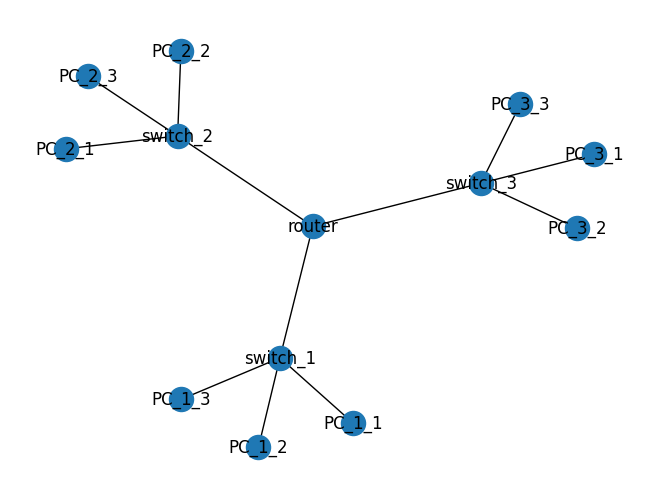

In [21]:
# 创建空图
G = nx.Graph()

# 创建节点
G.add_node("router", image=images["router"])
for i in range(1, 4):
    G.add_node(f"switch_{i}", image=images["switch"])
    for j in range(1, 4):
        G.add_node("PC_" + str(i) + "_" + str(j), image=images["PC"])

# 创建连接
G.add_edge("router", "switch_1")
G.add_edge("router", "switch_2")
G.add_edge("router", "switch_3")
for u in range(1, 4):
    for v in range(1, 4):
        G.add_edge("switch_" + str(u), "PC_" + str(u) + "_" + str(v))
nx.draw(G, with_labels=True)

# 更改节点图标

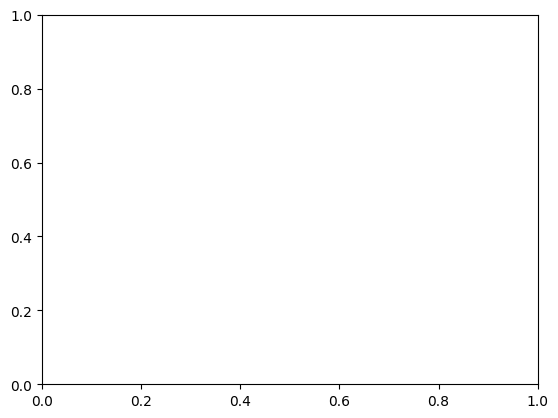

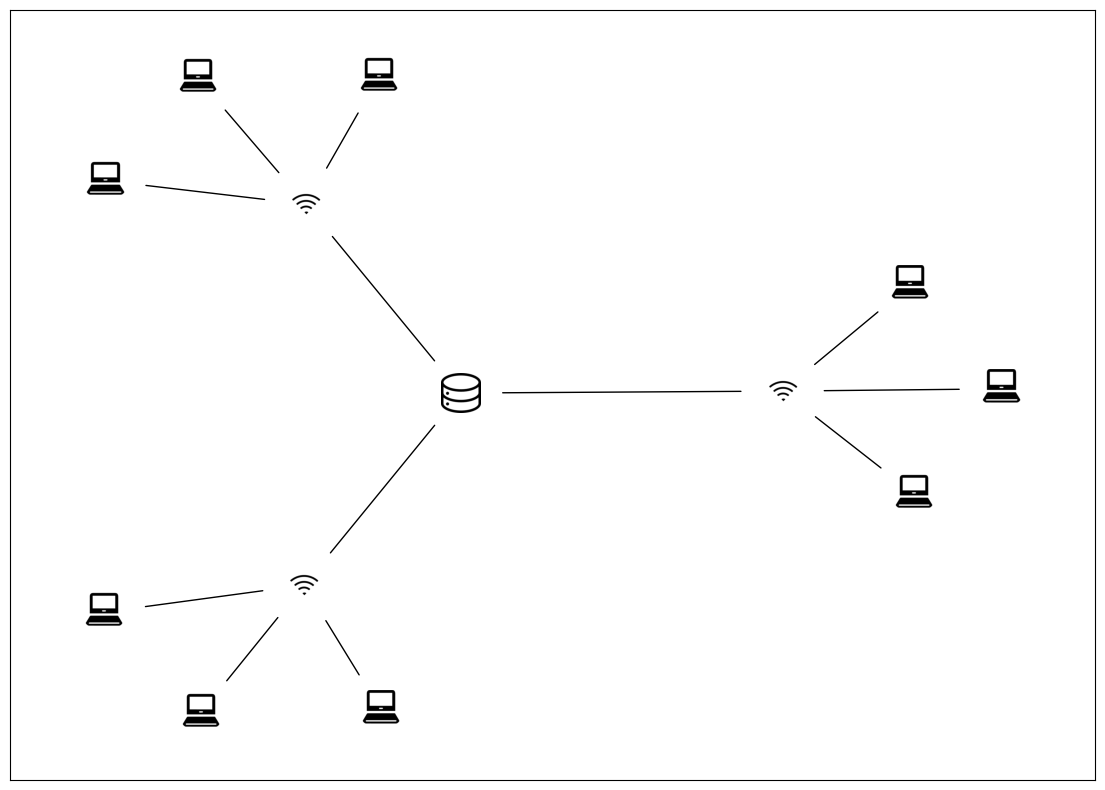

In [22]:
fig, ax = plt.subplots()

# 图片尺寸（相对于 X 轴）
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.04
icon_center = icon_size / 2.0

pos = nx.spring_layout(G, seed=1)
fig, ax = plt.subplots(figsize=(14,10))

# 绘制连接
# min_source_margin 和 min_target_margin 调节连接端点到节点的距离
nx.draw_networkx_edges(
    G,
    pos=pos,
    ax=ax,
    arrows=True,
    arrowstyle="-",
    min_source_margin=30,
    min_target_margin=30,
)

# 给每个节点添加各自的图片
for n in G.nodes:
    xf, yf = ax.transData.transform(pos[n]) # data坐标 转 display坐标
    xa, ya = fig.transFigure.inverted().transform((xf, yf)) # display坐标 转 figure坐标
    
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]['image'])
    a.axis("off")

plt.show()